<a href="https://colab.research.google.com/github/rahuls1098/heartdisease/blob/master/s_DS3000_FP4_Section2_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h2> DS 3000 - Fall 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h1>Heart Disease Predictors</h1> </center>

<center><h4>Christopher Wong, Rahul Suryadevara, Sarah Wessel</h4></center>

<center>

[Video Presentation](https://www.youtube.com/watch?v=Mh3dVShxjjQ&feature=youtu.be)

[Slide Deck](https://docs.google.com/presentation/d/188fLWSGWJJ0VQ1ENvHreMeTZuxdl3vKHJ0SDgMTRgtQ/edit?usp=sharing)
</center>

<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:


For our project, we chose to work with data describing heart disease risk factors in patients and build machine learning models to predict the presence of heart disease. We find this topic to be especially meaningful becuase heart disease is currently the largest cause of mortality among the world population. 

**Method**: 
Our dataset consists of 14 attributes describing characteristics and physiological data about the patient, including our target variable, which is the presence of heart disease. Using this dataset, we tested multiple hypothesese about heart disease risk factors. We have also trained machine learning models to predict the presence of heart disease in patients. 

**Results**: 
During hypothesis testing, we found that the data was insufficient to support either of our hypotheses. However, our machine learning models were able to perform with considerable accuracy (our SVM had 82% accuracy and our neural network had around 90% accuracy).

**Discussion**: In the future we would like to find a dataset with samples that are normally distributed among the tested features. This would allow for analysis of physiological feature correlation to heart disease presence *across* categories like age and gender.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

In [ ]:
!pip install matplotlib==3.1.0

import pandas as pd
import pickle

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model

from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# hide annoying sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

     |████████████████████████████████| 13.1MB 179kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.2
    Uninstalling matplotlib-3.1.2:
      Successfully uninstalled matplotlib-3.1.2


Using TensorFlow backend.


<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h3>Problem Statement</h3>

Our project topic is ‘Heart Disease Prediction.’ Heart disease is the largest cause of mortality among the world population, resulting in 614,000 deaths annually. This problem is particularly important to tackle because heart disease can be prevented by maintaining a nutritious diet and engaging in exercise. Additionally, diagnosing heart disase is challenging due to the high costs of both noninvasive and invasive techniques, different symptoms experienced by men and women, etc. We are particularly interested in exploring the physiological data that contributes to the onset of heart disease. Identifying the degree of risk factors (e.g. higher age) with the strongest correlation to heart disease would enable us to learn which areas are the primary targets for further exploration to ultimately prevent heart disease. 





<h3>Significance of the Problem</h3>

Using the aforementioned information, an active effort could be made to place emphasis on a healthier lifestyle for those predicted to be at risk. Given that the contributing factors to heart diseases are fairly easy to quantify, combined with the impactfulness of detecting the potential onset of heart disease before it happens, this prediction is essential in the effort to increase the general well-being of the population. This prediction tool would also enable medical professionals make informed decisions in their diagnoses. Due to the prominence of heart disease, there has been previous work done on this topic. A project under the NIH was conducted to implement an effective heart disease prediction system using a multilayer perceptron neural network. The same dataset as used in this project was split 60/40 (training/testing), and 15 parameters were used,. The experimental results showed nearly 100% accuracy (1). Another study was done with this dataset on Towards Data Science using a multitude of classification models, in which SVM performed the best at roughly 80% accuracy (2). 

1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5863635/
2. https://towardsdatascience.com/heart-disease-prediction-73468d630cfc

<h3>Questions/Hypotheses</h3>

We have formulated questions regarding the causality between key features and the target, as well as among features. For example:

* Are men more likely to have heart disease than women? Is higher age a risk factor for heart disease? Given that women live longer than men on average, do other features play a stronger role in causing heart disease in men than age (assuming men are more susceptible to heart disease)? Holding age constant would  isolate the factors that affect the gender more susceptible to heart disease more, which would in turn inform health care practitioners which risk factors to place more significance on. 
* Is high cholesterol a stronger risk factor for heart disease than a high resting blood pressure? This question would help answer which aspect of a healthy lifestyle (nutrition or physical activity) is of more importance in heart disease prevention. 
* Will the SVM model perform better than other models, and if so, at which extent of regularization (C value)? This will help determine which machine learning algorithm to ultimately utilize in making heart disease predictions, a task that involves many features.

We hypothesize that high cholesterol, high blood pressure, and probability of heart disease are positively correlated with age. Additionally, we hypothesize that men are more likely than women to develope heart disease when holding age constant. Lastly, based on past research on this topic, we hyptothesize that the SVM prediction model will outperform other models with at least 80% accuracy. 

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

We obtained our data as a .csv file from Kaggle, which was derived from the UCI Machine Learning Repository. 
* Link to Kaggle data source: https://www.kaggle.com/ronitf/heart-disease-uci
* Link to UCI parent source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

For this project, we have stored the data in a public repository on GitHub. Our dataset consists of 14 attributes describing characteristics and physiological data about the patient, including a target attribute predicting whether or not they have heart disease (ranges from mild to severe, but we will only consider severe cases as having heart disease). We chose to use this dataset because it focuses on distinguishing the presence vs. absence of heart disease, rather than going in depth on the other integer values indicating the presence of heart disease. Some of the attributes described in the data are: age, sex, chest pain type, resting blood presure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate, and diagnosis of heart disease. The key variables of interest around which we formulated hypotheses are age, sex, resting blood pressure (trestbp), and cholesterol (chol). We selected these features as they are prominent indicators of heart disease, but it is valuable to learn of the correlation between the features. It is worth noting that the variables being tested are subject to change on the basis of their disruptiveness (i.e. more disruptive features will be included as they affect the target value more). A more explicit breakdown of the variables is provided below:

* age: age in years
* sex: (1: male, 0: female)
* cp: Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
* trestbps: resting blood pressure (in mm Hg on admission to hospital)
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality)
* thalach: maximum heart rate achieved (bpm)
* exang: exercised induced angina (1: yes, 0: no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: presence of thalassemia (3: normal, 6: fixed defect, 7: reversible defect)
* target: (0: < 50% diameter narrowing => mild/moderate heart disease, 1: > 50% diameter narrowing => severe heart disease)





### 2.2. Variables



<h4><u> IVs and DVs for Hypotheses</u></h4>

(1) Higher cholesterol and resting blood pressure are associated with older age, which is more likely to cause heart disease as a result.
* IVs: Age
* DVs: Cholesterol, resting blood pressure, heart disease

(2) Men are more likely to develop heart disease than women, holding age constant.
* IVs: Gender 
* DVs: Heart disease

<h4> <u>Features and Target Variables for Predictive Models</u> </h4>

For our predictive models, our target variable will be the presence of Heart disease, which is labeled as 'target' in our dataset. All of the other attributes in our dataset will be used as features for training our models. To be specific, the training attributes are: age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercised induced angina, ST depression induced by exercise relative to rest, slope of peak exercise ST segment, number of major vessels, and the presence of thalassemia.


### 2.3. Data Analysis


We intend to create a predictor that can estimate the likelihood of heart disease using the criterion described in the sections above. Furthermore, we aim to predict whether a given individual is at risk of heart disease and provide recommendations on what can be improved based on comparisons to similar samples. We will be utilizing all features in the dataset as it has been preprocessed already, and the 13 features are a subset of 70+ original features. 

Since we have labeled training data and are looking for a binary output we plan to use supervised classification models. By comparing the performance of a variety of models (k-Nearest neighbor, Support Vector Machine, Naive Bayes, and Decision Trees) we will be able to determine model one leads to the most accurate prediction of heart disease. We will be using the same features and target variable across all algorithms, as these features are all correlated to the target variable. Each predictive model (supervised classification algorithms) is described below:
* k-Nearest neighbor: Predict a sample's class by looking at the k training samples nearest in distance to the sample.
* Support Vector Machine: Utilizes a line maximizing the margin between the line and nearest data points.
* Naive Bayes: A probabilistic classification algorithm that assumes features are equally important and statistically independent.
* Decision Tree: Learns a series of if/else statements to predict a target variable's class.

We decided to test kNN as it tends to perform well without adjustments, and our data was already preprocessed. We included SVM as a previous study used this algorithm and found it to yield a high accuracy. We tested Naive Bayes because all of our features are correlated to the target, and it would be interesting to see if there is a degee of independence among the features. Finally, we tested the Decision Tree algorithm because it performs well without scaling/normalization, and our initial training did not consist of scaled data. 


Additionally, while exploring our data set we noticed fairly complex relationships between the different features that could potentially contribute to a diagnosis of heart disease. Due to the complexity of feature relationships we also opted to train a neural network on our dataset and compare it’s overall performance to the traditional classifiers discussed above.

<h3>Feature Selection</h3> 

Because our data was preprocessed, and consists of 13 variables (which is a subset of 70+ original features), we did not need to do feature selection. From the heat map visualization (in the Data Exploration section), all variables were correlated to the target variable, so it was helpful to utilize all features to improve the prediction accuracy of the algorithms.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling


In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/rahuls1098/heartdisease/master/Data/heart.csv'

In [ ]:
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Performed to indentify distribution of cases with or without heart disease
def case_distribution():
  count = df["target"].value_counts()
  count.index = ["Heart Disease", "No Heart Disease"]
  return count

case_distribution()

Heart Disease       165
No Heart Disease    138
Name: target, dtype: int64

In [ ]:
# Performed to identify male and female population in dataset
def gender_distribution():
  gender = df["sex"].value_counts()
  gender.index = ["Male", "Female"]
  return gender

gender_distribution()

Male      207
Female     96
Name: sex, dtype: int64

Overall, our dataset does not require much cleaning because the data file we downloaded from Kaggle is a cleaned version of the original dataset that was published by the UCI. For example, the dataset we have here does not have null values or extra columns. 

Since there is not any additional cleaning that needs to be done, we will proceed by spliting our data into features and target variables. Scaling is performed in model optimization.

In [ ]:
# extracts features and target into tuple
def features_and_target(df):
    return (df.iloc[:,:13], df["target"])

features, target = features_and_target(df)

In [ ]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2. Data Exploration




In this section, we plan to explore patterns in our data including relationships between attributes and distributions of individual attributes. We will then discuss any notable findings.

We begin by describing the distributions of individual attributes using the .describe function built into the pandas library, the output of which is displayed below. 

By doing this, we can notice some interesting trends. For example:
* The participants in our dataset are 68% male.
* The average age of participants is 54 with a standard deviation of 9, so younger and older populations may be underrepresented.
* The average cholesterol is 246, which is high (>240 is generally considered to be high)
* 54% of the participants have been diagnosed with heart disease. 

Overall, these descriptions show us that this dataset is not representative of the population as a whole and is biased towards populations that tend to have higher rates of heart disease. While a biased dataset like this may be helpful in exploring the factors that lead to heart disease, it may pose risks if a ML model trained on this data is used on the population as a whole. For example, a model which is trained on this dataset would likely be less accurate on women or people over 70. 

In [ ]:
# create a copy of the original dataframe to use for visualizations
vis_df = df.copy()

# calculate some population level statistics for each of the features
vis_df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# pairplot for all features in the dataset
## plotting features pairwise creates a grid of Axes in which the relationship
## between two different variables can be analyzed.
#plt.figure(figsize=(10 ,10))
#sns.pairplot(vis_df, hue='target') #, y_vars=['target'], x_vars=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

# commented this out for now because it's a bit difficult to read (scatterplots don't work well with categorical data)
# I will make some individual visualizations for attribute-pairs that have the strongest correlations in the heatmap below
# that way, we can have types of plots that match better with the types of data - Sarah

The chart below is a heatmap of correlations between attributes, where blue shows a negative correlation and red/orange shows a positive correlation. Some of the strongest correlations are:
* chest pain type (cp) and max heart rate (thalach) are positively correlated with the target (r=0.43 and r=0.42 respectively)
*  exercise induced angina (exang) and ST depression induced by exercise (oldpeak) are negatively correlated with the target (r=-0.44 and r=-0.43 respectively).
* slope of the peak exercise ST segment (slope) and ST depression induced by exercise (oldpeak) are negatively correlated with each other (r=-0.58)


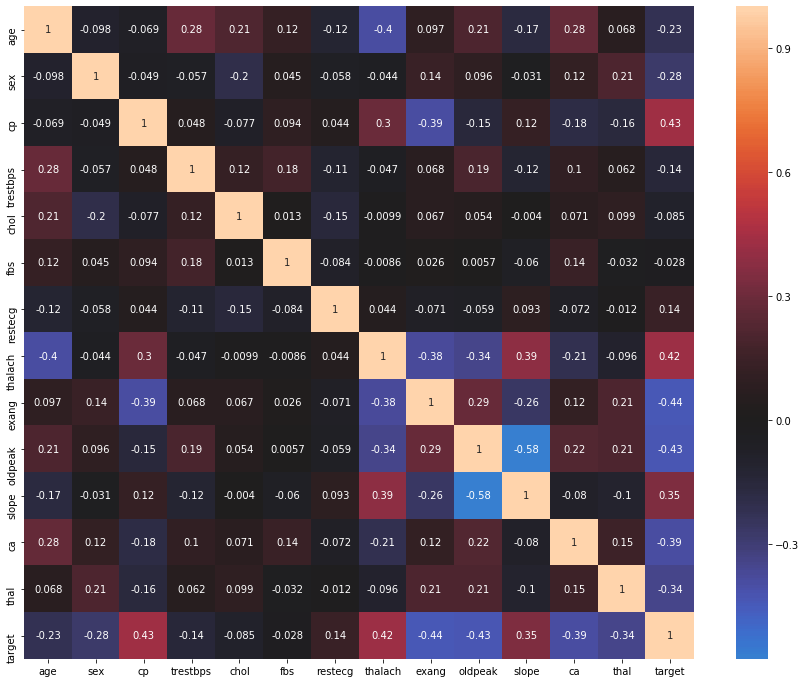

In [ ]:
# plot a correlation heatmap for our features.
# visualize the relationship between features and target
plt.figure(figsize = (15,12))
sns.heatmap(vis_df.corr(), annot=True, center=0)

Since we can see correlations between some attributes, it may be interesting to visualize those relationships to learn more about them.

Below are distributions for the continuous-type attributes that have strong correlations with the target (thalach, oldpeak).

In [ ]:
# rename target values so that keys on charts are more easily readable.
vis_df['target'] = vis_df['target'].map({0: 'Mild/Moderate', 1: 'Severe'})
vis_df = vis_df.rename(columns={"target": "Heart Disease"})

Text(0.5, 0.98, 'Distributions of ST depression induced by exercise (oldpeak)')

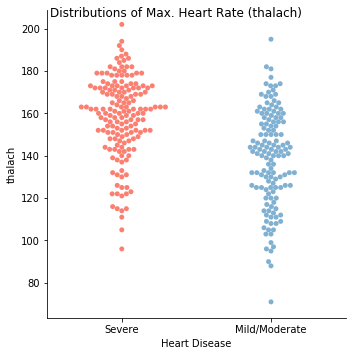

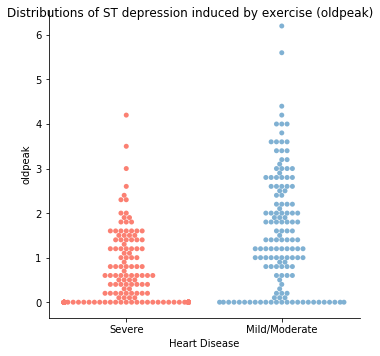

In [ ]:
# creating a more intuitive color palette
colors = sns.color_palette(['#fb8072', '#80b1d3']) # blue (no heart disease) , red (heart disease)

# draw graphs of distributions
ax1 = sns.catplot(x='Heart Disease', y="thalach", kind="swarm", palette=colors, data=vis_df);
ax1.fig.suptitle("Distributions of Max. Heart Rate (thalach)")

ax2 = sns.catplot(x='Heart Disease', y="oldpeak", kind="swarm", palette=colors, data=vis_df);
ax2.fig.suptitle("Distributions of ST depression induced by exercise (oldpeak)")

Below are barcharts for the categorical-type attributes that have strong correlations with the target (cp, exang, slope, ca).

Text(0.5, 0.98, 'Heart Disease Counts by # Vessels colored by Flouroscopy (ca)')

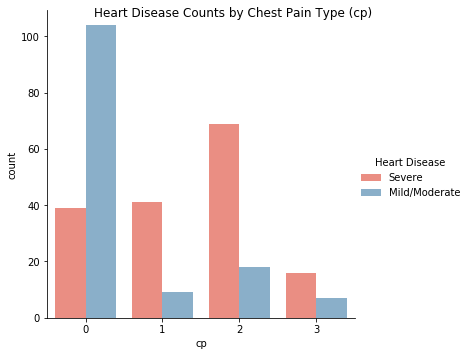

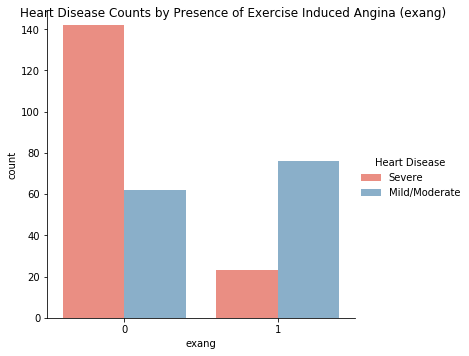

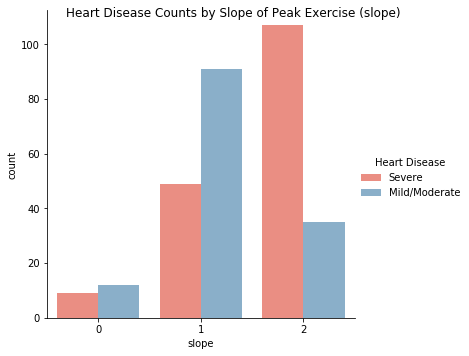

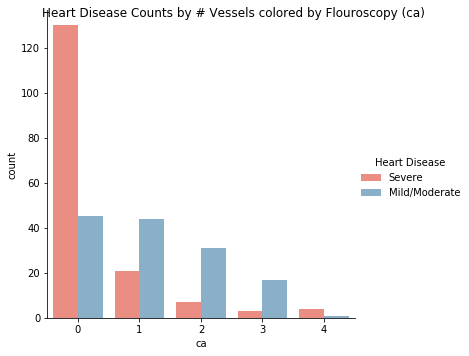

In [ ]:
ax1 = sns.catplot(x="cp", hue="Heart Disease", kind="count", palette=colors, data=vis_df);
ax1.fig.suptitle("Heart Disease Counts by Chest Pain Type (cp)")

ax2 = sns.catplot(x="exang", hue="Heart Disease", kind="count", palette=colors, data=vis_df);
ax2.fig.suptitle("Heart Disease Counts by Presence of Exercise Induced Angina (exang)")

ax3 = sns.catplot(x="slope", hue="Heart Disease", kind="count", palette=colors, data=vis_df);
ax3.fig.suptitle("Heart Disease Counts by Slope of Peak Exercise (slope)")

ax4 = sns.catplot(x="ca", hue="Heart Disease", kind="count", palette=colors, data=vis_df);
ax4.fig.suptitle("Heart Disease Counts by # Vessels colored by Flouroscopy (ca)")

Finally, we will visualize non-target attributes which are correlated with eachother. 

Text(0.5, 0.98, 'Chest Pain Type vs. Exercise-Induced Angina (exang)')

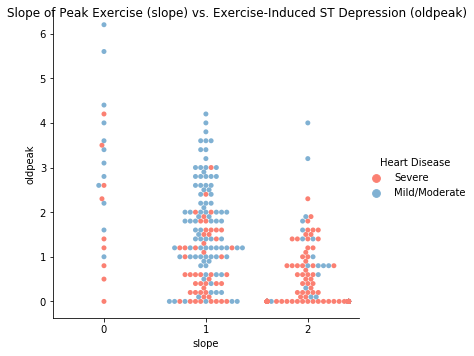

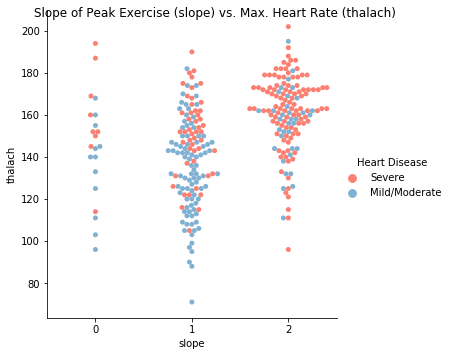

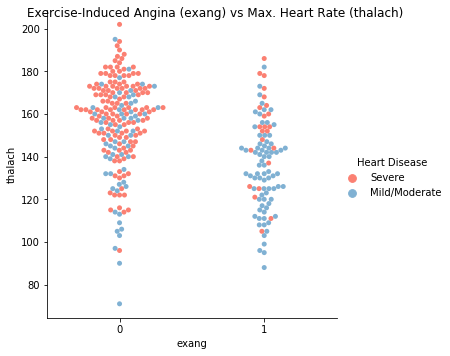

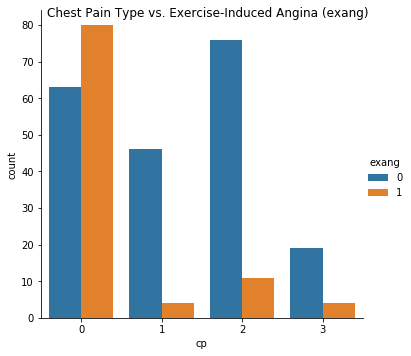

In [ ]:
# slope (categorical) vs oldpeak (continuous)
ax1 = sns.catplot(x='slope', y="oldpeak", hue="Heart Disease", kind="swarm", palette=colors, data=vis_df);
ax1.fig.suptitle("Slope of Peak Exercise (slope) vs. Exercise-Induced ST Depression (oldpeak)")

# slope (categorical) vs thalach (continuous)
ax2 = sns.catplot(x='slope', y="thalach", hue="Heart Disease", kind="swarm", palette=colors, data=vis_df);
ax2.fig.suptitle("Slope of Peak Exercise (slope) vs. Max. Heart Rate (thalach)")

# exang (binary) vs thalach (continuous)
ax3 = sns.catplot(x='exang', y="thalach", hue="Heart Disease", kind="swarm", palette=colors, data=vis_df);
ax3.fig.suptitle("Exercise-Induced Angina (exang) vs Max. Heart Rate (thalach)")

# cp (categorical) vs exang (binary)
ax4 = sns.catplot(x="cp", hue="exang", kind="count", data=vis_df);
ax4.fig.suptitle("Chest Pain Type vs. Exercise-Induced Angina (exang)")


### 3.3. Model Construction
* If you proposed hypotheses, conduct your hypothesis tests
* For your machine learning question(s), split data into training, validation, and testing sets (or use cross-validation)
* Apply machine learning algorithms (apply at least three algorithms)
* Train your algorithms

<h3>Hypothesis Tests</h3>
<h5><b>(1) Higher cholesterol and resting blood pressure are associated with older age, which is more likely to cause heart disease as a result.</b></h5>


We can begin by visualizing the relationships between age, resting blood pressure, and the target variable. 

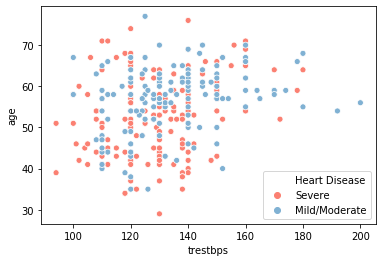

In [ ]:
# scatterplot of bp vs age, where target determines color
sns.scatterplot(x='trestbps', y='age', hue='Heart Disease', palette=colors, data=vis_df);

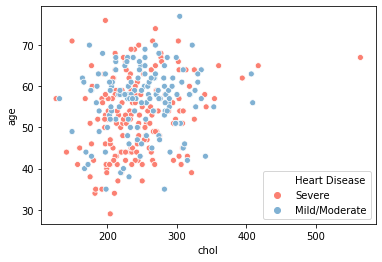

In [ ]:
# scatterplot of cholesterol vs age, where target determines color
sns.scatterplot(x='chol', y='age', hue='Heart Disease', palette=colors, data=vis_df);

The chart above does not show an obvious correlation between age and heart disease or between blood pressure and heart disease. However, we would benefit from also doing a numerical analysis. Below, we split the data into two groups based on whether they were above or below median age, and then evaluate the blood pressure and cholesterol levels for those two groups

In [ ]:
# Find max, min, and median age to split dataset between older and younger age
print("Maximum age: " + str(df["age"].max()))
print("Minimum age: " + str(df["age"].min()))
print("Median: " + '{:02.0f}'.format(df["age"].median()))

Maximum age: 77
Minimum age: 29
Median: 55


In [ ]:
# Create a dataframe with just older patients 
df_older = df.where(df["age"] >= 55).dropna(how='any')

# Create a dataframe with just younger patients 
df_younger = df.where(df["age"] < 54).dropna(how='any')

patient_age_groups = {"younger":("54", "below", df_younger), "older":("55", "above", df_older)}

# Print cholesterol, blood pressure, and heart disease data for each age category
for age, group in patient_age_groups.items():
  print("\nFor " + age + " patients age " + group[0] + " and " + group[1] + ": \n")
  print("Number of " + age + " patients: " + str(len(group[2])))
  print("Average cholesterol levels: " + '{:02.0f}'.format(group[2]["chol"].mean()))
  print("Average resting blood pressure: " + '{:02.0f}'.format(group[2]["trestbps"].mean()))
  print("Percentage of patients with heart disease: " + '{:02.2f}'.format((len(group[2].where(df["target"] == 1).dropna(how='any'))/len(group[2])) * 100) + "%")


For younger patients age 54 and below: 

Number of younger patients: 128
Average cholesterol levels: 234
Average resting blood pressure: 126
Percentage of patients with heart disease: 70.31%

For older patients age 55 and above: 

Number of older patients: 159
Average cholesterol levels: 255
Average resting blood pressure: 137
Percentage of patients with heart disease: 40.88%


Despite having higher average cholesterol levels and resting blood pressure, a significantly smaller percentage of older patients have heart disease compared to younger patients. While a part of the hypothesis is true (higher cholesterol and resting BP for older patients), this does not correlate to higher chance of heart disease in this data set. To formally test the hypothesis, an independent-samples t-test may be performed as there is one independent variable (age) with two conditions: younger, older.

In [ ]:
# Divide the numerical ages into two categories
def modify_age(age):
  if(age > 54):
    return "55 and above"
  else:
    return "54 and below"

# Obtain descriptive statistics on the age-target relation
age_mod = df.copy()
age_mod["age"] = age_mod["age"].apply(modify_age)

age_mod.set_index(['age'])
descriptives_age = age_mod.groupby('age').agg(["count", "mean", "std", "sem"])['target']
descriptives_age

,count,mean,std,sem
age,,,,
54 and below,144,0.694444,0.462250,0.038521
55 and above,159,0.408805,0.493166,0.039111


In [ ]:
# Prepare the categories for t-test analysis
younger = age_mod[age_mod["age"] == "54 and below"]["target"]
older = age_mod[age_mod["age"] == "55 and above"]["target"]
results = stats.ttest_ind(younger, older)
tstatistic = results[0]
pvalue = results[1]
pvalue = float(format(pvalue, '.10f'))

deg_f = len(younger) +len(older) - 2

# Report tstatistic and pvalue
def report_independent_t (t, p, deg):
    print("t(%d)=%.2f, p=%.3f" % (deg, t, p))

report_independent_t(tstatistic, pvalue, deg_f)

t(301)=5.19, p=0.000


In [ ]:
levene_results = stats.levene(younger, older)
levene_results

LeveneResult(statistic=3.5149218948638516, pvalue=0.061786734005483956)

In [ ]:
shapiro_results = stats.shapiro(age_mod["target"])
shapiro_results

(0.6335939168930054, 5.667253164007942e-25)

A high tstatistic and pvalue < 0.05 was obtained indicating that the null hypothesis must be rejected. The null hypothesis stated that there was no correlation between age and target (having heart disease). Levene's test with pvalue > 0.05 tells us there is an equality of variances in the data. However, the pvalue of the Shapiro test for normality was < 0.05, which indicates that the population was not normally distributed. The rejection of the null hypothesis indicates that one group (54 and below according to the informal hypothesis test conducted prior) has a higher chance of developing heart disease. The lack of normal distribution in the data, however, shows the absence of an even age distribution. An even age distribution could substantially shift the results favoring older patients having heart disease.

<h5><b>(2) Men are more likely to develop heart disease than women, holding age constant.</b></h5>

In [ ]:
# Create a data frame with just males
df_male = df.where(df["sex"] == 1).dropna(how='any')

# Create a data frame with just females
df_female = df.where(df["sex"] == 0).dropna(how='any')

print("Number of men: "+ str(len(df_male)))
print("Percentage of men with heart disease: " + '{:02.2f}'.format((len(df_male.where(df["target"] == 1).dropna(how='any'))/len(df_male)) * 100) + "%")
print("Number of women: "+ str(len(df_female)))
print("Percentage of women with heart disease: " + '{:02.2f}'.format((len(df_female.where(df["target"] == 1).dropna(how='any'))/len(df_female)) * 100) + "%")

Number of men: 207
Percentage of men with heart disease: 44.93%
Number of women: 96
Percentage of women with heart disease: 75.00%


From the raw data, a higher percentage of the female patients have heart disease than male patients. 

A formal independent-samples t-test will provide further insight on the equality, normality, and significance of the results.



In [ ]:
# Divide the numerical genders into two categories
def modify_sex_1(sex):
  if(sex == 0):
    return "Female"
  else:
    return "Male"

# Obtain descriptive statistics on the sex-target relation
sex_mod = df.copy()
sex_mod["sex"] = sex_mod["sex"].apply(modify_sex_1)

sex_mod.set_index(['sex'])
descriptives_sex = sex_mod.groupby('sex').agg(["count", "mean", "std", "sem"])['target']
descriptives_sex



,count,mean,std,sem
sex,,,,
Female,96,0.750000,0.435286,0.044426
Male,207,0.449275,0.498626,0.034657


In [ ]:
# Prepare the categories for t-test analysis
male = sex_mod[sex_mod["sex"] == "Male"]["target"]
female = sex_mod[sex_mod["sex"] == "Female"]["target"]
results1 = stats.ttest_ind(male, female)
tstatistic1 = results[0]
pvalue1 = results[1]
pvalue1 = float(format(pvalue, '.10f'))

deg_f1 = len(male) +len(female) - 2

# Report tstatistic and pvalue
def report_independent_t1 (t, p, deg):
    print("t(%d)=%.2f, p=%.3f" % (deg, t, p))

report_independent_t1(tstatistic1, pvalue1, deg_f1)

t(301)=5.19, p=0.000


In [ ]:
levene_results = stats.levene(male, female)
levene_results

LeveneResult(statistic=11.325501268719837, pvalue=0.0008636330030266723)

In [ ]:
shapiro_results = stats.shapiro(sex_mod["target"])
shapiro_results

(0.6335939168930054, 5.667253164007942e-25)

A high tstatistic and pvalue < 0.05 was obtained indicating that the null hypothesis must be rejected. The null hypothesis stated that there was no correlation between gender and target (having heart disease). Levene's test with pvalue < 0.05 tells us there is not an equality in variance in the data. Furthermore, the pvalue of the Shapiro test for normality was < 0.05, which indicates that the population was not normally distributed. The rejection of the null hypothesis indicates that one group (female according to the informal hypothesis test conducted prior) has a higher chance of developing heart disease. The lack of normal distribution in the data as well as equality in variance indicates that the data set does not evenly represent conditions across gender.

It is worth looking into the age statistics of each gender to further identify patterns.

In [ ]:
# Divide the numerical genders into two categories
def modify_sex(num):
  if(num == 1):
    return "Male"
  else:
    return "Female"

df_mod = df.copy()
df_mod["sex"] = df_mod["sex"].apply(modify_sex)

df_mod.set_index(["sex"])
df_mod.groupby("sex").agg(["count", "mean", "std"])[['age']]

age                     
       count       mean       std
sex                              
Female    96  55.677083  9.409396
Male     207  53.758454  8.883803

The average age of females is higher than that of males. Selecting a subset of data at a higher age range, say 65 and above, for both males and females will aid in holding age constant. This way, the percentage of those affected by heart disease within each gender will better inform which gender is more susceptible to heart disease.

In [ ]:
# Create a dataframe of women aged 65 and above
df_female_older = df_female.where(df_female["age"] < 51)

# Create a dataframe of men aged 65 and above
df_male_older = df_male.where(df_male["age"] < 51)

gender_age_targets = {'Male': df_male_older, 'Female': df_female_older}

for gender, target in gender_age_targets.items():
  print(gender + ":\n" )
  print(target.agg(["count", "mean", "std"])[['target']].T)
  print("---------------------------------\n")

Male:

        count      mean       std
target   68.0  0.588235  0.495812
---------------------------------

Female:

        count      mean      std
target   27.0  0.962963  0.19245
---------------------------------



The above summary yields interesting results. The average target value for men age 65 and above is 0.25 (i.e. 25% have heart disease), while the average target value for women age 65 and above is 0.88 (88% have heart disease). We could arrive at the conclusion that women are more susceptible to heart disease than men, but a further piece of analysis should be done. It is worth considering the average age of those who have heart disease by gender.

In [ ]:
# Extract a data frame consisting of females who have heart disease
df_f_disease = df_female.where(df_female['target'] == 1).dropna()

# Extract a data frame consisting of males who have heart disease
df_m_disease = df_male.where(df_male['target'] == 1).dropna()

print("Average age of females with heart disease: " + '{:02.0f}'.format(df_f_disease['age'].mean()))
print("Average age of males with heart disease: " + '{:02.0f}'.format(df_m_disease['age'].mean()))

Average age of females with heart disease: 55
Average age of males with heart disease: 51


Females who have heart disease are older than males who have heart disease. The average age of post-menopausal women is 51, and given that women with heart disease are on average age 55, a correlation exists. From a previous analysis, it was found that the average age of women in this dataset is higher than that of men, which causes the data to be biased towards women having heart disease. 

In [ ]:
# Obtain the quantity of each gender above a given age
f_num = len(df_female.where(df_female['age'] > 51).dropna())
f_tot = len(df_female)
m_num = len(df_male.where(df_male['age'] > 51).dropna())
m_tot = len(df_male)

# Compute percentage of high-risk patients by gender
print("Number of post-menopausal females in dataset: " + str(f_num))
print("Total number of females: " + str(f_tot))
print("Percentage of high-risk females: " + '{:02.2f}'.format((f_num / f_tot) * 100) + "%")

print("\nNumber of males at comparable age: " + str(m_num))
print("Total number of males: " + str(m_tot))
print("Percentage of high-risk males: " + '{:02.2f}'.format((m_num / m_tot) * 100) + "%")

Number of post-menopausal females in dataset: 65
Total number of females: 96
Percentage of high-risk females: 67.71%

Number of males at comparable age: 131
Total number of males: 207
Percentage of high-risk males: 63.29%


It is now clear that the dataset contains a larger percentage of high-risk females than higher-risk males. Performing data wrangling to eliminate a chunk of the high-risk female population would not be ideal given the already limited samples of females. While the data suggests there is a higher percentage of females susceptible to heart disease than males, the results of the t-test indicate that uneven data distribution could have factored into this. However, it can be concluded that post-menopausal females are roughly as susceptible to heart disease as older men (the lack of variance indicated by the t-test is not as significant in this conclusion given that age was held constant).

<h3>Splitting Data and Training Algorithms</h3>

<h4>Traditional ML Classifiers</h4>

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# create dictionary object with four classifiers
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': SVC(gamma='scale'),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()}

# fits the four classifiers using the percentage-split approach
def classifiers_percentage_split():
    #split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
    
    # applies classifiers through iteration
    for estimator_name, estimator_object in estimators.items():
        # load sample training set and target training set
        estimator = estimator_object.fit(X=X_train, y=y_train)
        # get array with predicted class of each case
        predicted = estimator.predict(X=X_test)
        # get prediction accuracy for the test data
        accuracy = estimator.score(X_test, y_test)
        
        print(estimator_name + ": \n\t" + "Prediction accuracy on the test data:", f"{accuracy:.2%}\n")

In [ ]:
classifiers_percentage_split()

k-Nearest Neighbor: 
	Prediction accuracy on the test data: 59.21%

Support Vector Machine: 
	Prediction accuracy on the test data: 59.21%

Gaussian Naive Bayes: 
	Prediction accuracy on the test data: 77.63%

Decision Tree: 
	Prediction accuracy on the test data: 71.05%



<h4> Neural Network Classifier </h4>

In [ ]:
# scale features
sc = StandardScaler()
scaled_features = sc.fit_transform(features)

def analyzeModel(model, history, X_test, y_test):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  _, accuracy = model.evaluate(X_test, y_test)
  print('Accuracy: %.2f' % (accuracy*100))

def split_data(features, target):
  return train_test_split(features, target, test_size=0.2)

# train NN
def trainNN(features, target):
  model = Sequential()
  model.add(Dense(13, input_dim=13, activation='relu'))
  # model.add(Dense(7, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=2, verbose=0)
  return model, history






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










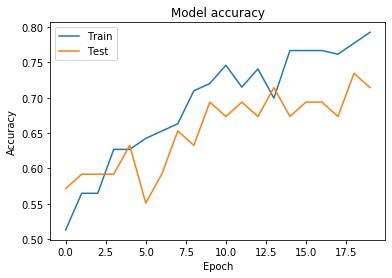

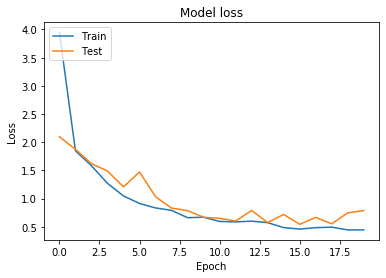

61/61 [==============================] - 0s 177us/step
Accuracy: 73.77


In [ ]:
# split the data
X_train, X_test, y_train, y_test = split_data(features, target)

# compile and train model
nnModel, nnHistory = trainNN(features, target)
analyzeModel(nnModel, nnHistory, X_test, y_test)


### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
* Interpret your results from multiple models (and hypothesis tests, if any)

From the raw data, Gaussian Naive Bayes performed the best with 77.63% prediction accuracy. The models will be tuned in the following section.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

Model optimization is being performed to avoid overfitting and underfitting the data. The data is not distributed evenly as revealed by independent-samples t-tests performed in the Hypothesis Testing section, so optimizing the data should reveal higher prediction accuracy.

#### Traditional Classifier

In [ ]:
# scale features
sc = StandardScaler()
scaled_features = sc.fit_transform(features)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features, target, random_state=3000)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

# define models with the hyperparameters that we want to try
estimators = {
    'k-Nearest Neighbor': {
        'model': KNeighborsClassifier,
        'param_grid': {'n_neighbors': [2, 3, 5, 7, 10]}
    },
    'Support Vector Machine': {
        'model': svm.SVC,
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10], 
            'gamma' : [0.001, 0.01, 0.1, 1], 
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB,
        'param_grid': {}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier,
        'param_grid': {
            'criterion': ['gini', 'entropy']
        }
    }
}

# find best hyperparameters, re-evaluate accuracy, and re-train models
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
for estimator_name, estimator_info in estimators.items():
    # use gridsearch to choose hyperparameters
    grid_search = GridSearchCV(estimator_info['model'](), estimator_info['param_grid'])
    grid_search.fit(scaled_features, target)
    best_params = grid_search.best_params_

    # use cross validation to evaluate performance with new params 
    original_scores = cross_val_score(estimator=estimator_info['model'](), X=X_train, y=y_train, cv=kfold)
    new_model = estimator_info['model'](**best_params)
    improved_scores = cross_val_score(estimator=new_model, X=X_train_scaled, y=y_train_scaled, cv=kfold)

    # train and store model
    trained_model = new_model.fit(X_train_scaled, y_train_scaled)
    estimator_info['trained_model'] = trained_model

    # print output
    print(estimator_name)
    print('\tOptimized Hyperparameters:', best_params)
    print('\tOriginal Scores')
    print("\t\t" + f'mean accuracy={original_scores.mean():.2%}, ' + f'standard deviation={original_scores.std():.2%}')
    print('\tImproved Scores')
    print("\t\t" + f'mean accuracy={improved_scores.mean():.2%}, ' + f'standard deviation={improved_scores.std():.2%}')

k-Nearest Neighbor
	Optimized Hyperparameters: {'n_neighbors': 7}
	Original Scores
		mean accuracy=67.08%, standard deviation=11.21%
	Improved Scores
		mean accuracy=83.32%, standard deviation=7.64%
Support Vector Machine
	Optimized Hyperparameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
	Original Scores
		mean accuracy=55.61%, standard deviation=9.99%
	Improved Scores
		mean accuracy=84.19%, standard deviation=8.23%
Gaussian Naive Bayes
	Optimized Hyperparameters: {}
	Original Scores
		mean accuracy=83.30%, standard deviation=8.13%
	Improved Scores
		mean accuracy=83.30%, standard deviation=8.13%
Decision Tree
	Optimized Hyperparameters: {'criterion': 'entropy'}
	Original Scores
		mean accuracy=78.93%, standard deviation=10.85%
	Improved Scores
		mean accuracy=76.25%, standard deviation=12.80%


#### NN Classifier

After several training/testing runs we were able to create a model with a prediction accuracy as high as 95% as can be seen the accuracy graph below. At the same time, we verified that the model was not being overfitted by plotting the training/testing loss. In the "model loss" plot we can see the loss for both the training/testing data are asymptotically converging to zero as training moves forward in time.

Unfortunately, due to Google Colab limitations, we were unable to load the final model (which we trained offline for performance) into this notebook. Both the [Keras H5 model file](https://github.com/rahuls1098/heartdisease/blob/master/neural_network_munging/best-model.h5) and the [Keras history pickle](https://github.com/rahuls1098/heartdisease/blob/master/neural_network_munging/best-model-history) can be found on our Github. 

![alt text](https://raw.githubusercontent.com/rahuls1098/heartdisease/master/neural_network_munging/Screen%20Shot%202019-12-08%20at%201.29.25%20PM.png)

### 3.6. Model Testing
* Test your tuned algorithms using your testing set

In [ ]:
# test each model
for estimator_name, estimator_info in estimators.items():
    accuracy = estimator_info['trained_model'].score(X_test_scaled, y_test_scaled)
    print(estimator_name, 'accuracy:', format(accuracy*100, ".2f"), '%')

k-Nearest Neighbor accuracy: 77.63 %
Support Vector Machine accuracy: 82.89 %
Gaussian Naive Bayes accuracy: 77.63 %
Decision Tree accuracy: 73.68 %


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Intepret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)

In order to analyze the data, we first split the dataset into its target and features components. The features and target were split into training and testing variables, and the following algorithms' performance on these variables were compared:
* k-Nearest Neighbor
* Support Vector Machine
* Gaussian Naive Bayes
* Decision Tree

Initially, Gaussian Naive Bayes revealed the best performance. However, model optimization was done by performing hyperparameter tuning via GridSearch and scaling the data. For k-Nearest Neighbor, the number of neighbors was varied. For SVM, the C, gamma, and kernel values were varied. For Gaussian Naive Bayes, nothing was changed as the algorithm already yielded the highest performance. For the Decision Tree, the param_grid criterion was varied. SVM revealed the highest performance in the model testing section, with 82.89% accuracy, hence this would be the algorithm utilized for the predictive model. 

When analyzing the features in the dataset we noticed a complex corelation between the 13 features and our target prediction. Due to the complexity of these relationships, further demonstrated by the pairplot and heatmap. Our model architecture used a two layer Sequential model. The first layer of our model has a dense layer with 13 nodes and a relu activation. These modes are then distilled down into a single  

In the hypothesis testing, neither initial hypotheses were accepted. For the first hypothesis, it was found that higher age correlated to higher cholestorel and blood pressure, and that younger patients were more likely to develop heart disease than older patients. An independent samples t-test indicated that the null hypothesis should be rejected (age and heart disease are correlated). Additionally, the shapiro test for normality revealed a non-normal distribution of data. In other words, the younger patients sampled for this study may have had heart disease more frequently, but there were not as many younger patients  as older patients. 

For the second hypothesis, it was found that females were more likely to develop heart disease than males. An independent samples t-test was performed and it was found that the null hypothesis could be rejected, indicating that there was indeed a correlation between gender and heart disease. Both the levene and shapiro tests had pvalues < 0.05, which indicates that the gender data was not normally distributed, nor was there equality in variance. This is a reflection of the smaller sample of females in the dataset. Further analysis was done, however. The gender data was further filtered by age (65 and above), and it was found that females still had a higher chance of developing heart disease. Finally, the average age by gender of those who developed heart disease was found and it turned out that the average age for females was higher than that of males. The age for females was above the average menopausal age, and it is known that women post-menopause have a higher chance of developing heart disease (than pre-menopausal), and an equal chance as compared to males. 
The testing performed showed a close percentage of high-risk females and males (67.71% and 63.29%), which confirms the latter. Given that age was held constant (i.e. 65 and above, the lack of variance and equality indicated by the t-test is not as significant).

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. 

**Sarah Wessel:**
* *Executive Summary*: Wrote summaries of introduction, methods & results
* *Introduction & Methods (1 & 2)*: Contributed to written sections 
* *Data Exploration (3.2)*: written analysis and visualizations
* *Hypothesis Testing*: created visualizations
* *Model Optimization (3.5) & Model Testing (3.6)*: Wrote code to tune hyperparameters and display results

**Christopher Wong:**
* *Introduction & Methods (1 & 2)
* *Data Exploration (3.2)*: heatmap and pairplot exploring relationship between features
* *Model Construction (3.3)*: designed architecure of neural network
* *Model Evaluation (3.4)*: analyzing training loss for neural network
* *Model Optimization (3.5)*: hyperparameter tuning and model re-training
* Discussion section

**Rahul Suryadevara:**
* *Executive Summary*: Discussion
* *Introduction & Methods (1 & 2)*: Contributed to Problem Statement, Significance of Problem, and Questions/Hypotheses
* *Method*: 
  * 2.1 Data Acquisition
  * 2.2 Variables
* *Results*: 
  * 3.1 Data Wrangling (case/gender distribution, splitting features)
  * 3.3 Hypothesis Tests 1, 2 (not visualizations)
  * Splitting Data and Training Algorithms
  * Traditional ML Classifiers (before tuning)
* *Discussion section*